In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [3]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import torch.nn as nn
import torchvision.models as models

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [53]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()
##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

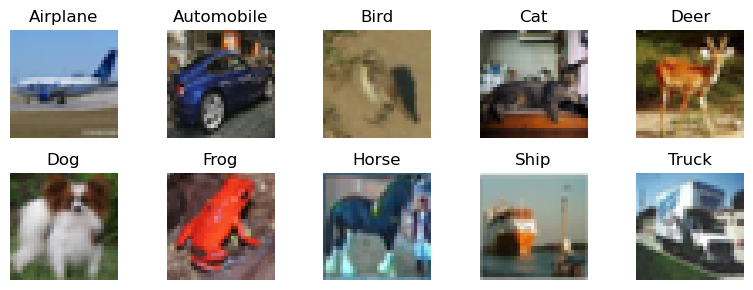

In [54]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [55]:
##################################################
################### YOUR CODES ###################

#normalize colors to 0 to 1
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

print(x_train.shape)
print(x_val.shape)

#encode by one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
##################################################

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [56]:
##################################################
################### YOUR CODES ###################
input_shape = (32, 32, 3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
##################################################

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [57]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [59]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, batch_size = 64, epochs=10, validation_data=(x_val, y_val),validation_split=0.3)
##################################################

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 1.7165 - accuracy: 0.3656 - val_loss: 1.3161 - val_accuracy: 0.5299
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.3576 - accuracy: 0.5150 - val_loss: 1.1437 - val_accuracy: 0.5911
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2081 - accuracy: 0.5769 - val_loss: 1.0426 - val_accuracy: 0.6362
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1132 - accuracy: 0.6139 - val_loss: 0.9993 - val_accuracy: 0.6516
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0371 - accuracy: 0.6388 - val_loss: 0.9637 - val_accuracy: 0.6628
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9865 - accuracy: 0.6565 - val_loss: 0.9268 - val_accuracy: 0.6743
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9334 - accuracy: 0.6763 - val_loss: 0.8727 - val_accuracy: 0.6924
Epoch 

This function plots the `loss` and `accuracy` of your model by the model's history.

In [60]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

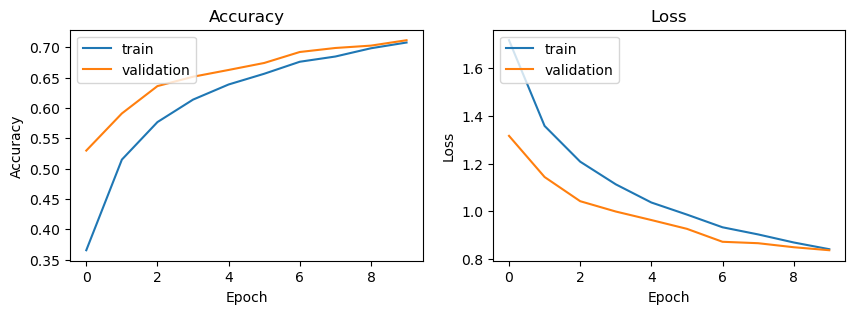

In [61]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [62]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train_1, y_train_1), (x_val_1, y_val_1) = keras.datasets.cifar10.load_data()
##################################################

print('Training:', x_train_1.shape, y_train_1.shape)
print('Validation:', x_val_1.shape, y_val_1.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


In [63]:
##################################################
################### YOUR CODES ###################

# use flipping , rotation and add noise to the preprocessing
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

#apply the augmentation layer on the preprocessing part of model
my_model = keras.Sequential(
    [
        data_augmentation,
        model
    ]
)
my_model.build(input_shape=(None, 32, 32 , 3))
my_model.summary()
##################################################

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_7 (Sequential)   (None, 10)                122570    
                                                                 
Total params: 122,570
Trainable params: 122,570
Non-trainable params: 0
_________________________________________________________________


In [64]:
##################################################
################### YOUR CODES ###################
my_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

In [67]:
##################################################
################### YOUR CODES ###################
my_history = my_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)
##################################################

Epoch 1/10
704/704 [==============================] - 5s 7ms/step - loss: 1.3237 - accuracy: 0.5330 - val_loss: 1.0527 - val_accuracy: 0.6236
Epoch 2/10
704/704 [==============================] - 5s 7ms/step - loss: 1.3182 - accuracy: 0.5401 - val_loss: 1.1369 - val_accuracy: 0.6068
Epoch 3/10
704/704 [==============================] - 6s 8ms/step - loss: 1.3011 - accuracy: 0.5466 - val_loss: 1.0401 - val_accuracy: 0.6298
Epoch 4/10
704/704 [==============================] - 5s 7ms/step - loss: 1.2963 - accuracy: 0.5467 - val_loss: 1.0500 - val_accuracy: 0.6232
Epoch 5/10
704/704 [==============================] - 5s 7ms/step - loss: 1.2869 - accuracy: 0.5512 - val_loss: 1.0844 - val_accuracy: 0.6228
Epoch 6/10
704/704 [==============================] - 5s 7ms/step - loss: 1.2799 - accuracy: 0.5550 - val_loss: 1.0164 - val_accuracy: 0.6396
Epoch 7/10
704/704 [==============================] - 5s 7ms/step - loss: 1.2727 - accuracy: 0.5606 - val_loss: 1.0602 - val_accuracy: 0.6174
Epoch 

Let's see your model performance with augmentation.

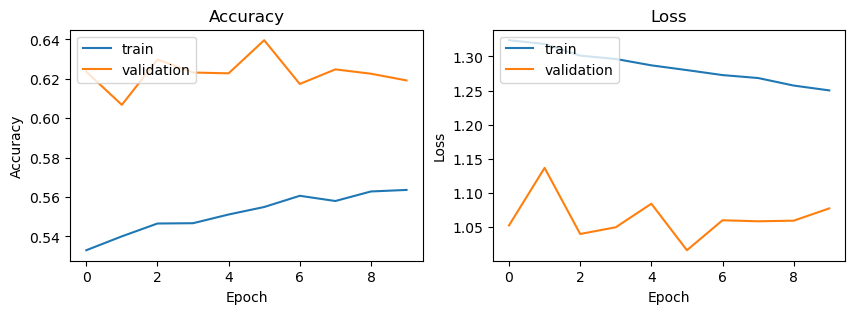

In [68]:
plot_acc_loss(my_history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [69]:
(x_train_2, y_train_2), (x_val_2, y_val_2) = keras.datasets.cifar10.load_data()
x_train_2 = x_train_2.astype('float32') / 255.0
x_val_2 = x_val_2.astype('float32') / 255.0
num_classes = 10
y_train_2 = to_categorical(y_train_2, num_classes)
y_val_2 = to_categorical(y_val_2, num_classes)
print(x_train_2.shape)
print(x_val_2.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [70]:
# create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    validation_split=0.2
)

# resize and preprocess the images using the ImageDataGenerator
train_generator = datagen.flow(x_train_2, y_train_2, batch_size=64, subset='training', shuffle=True)
validation_generator = datagen.flow(x_val_2, y_val_2, batch_size=64, subset='validation', shuffle=False)

In [71]:
# load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3) , include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [72]:
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning
x = base_model(inputs, training=False)
# convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model1 = keras.Model(inputs, outputs)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_11 (Dense)            (None, 256)               524544    
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 24,061,706
Non-trainable params: 53,120
____________________________________________

In [73]:
#compile and train the model exept the part of resnet
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history1 = model1.fit(train_generator, validation_data=validation_generator, batch_size=64, epochs=10)

Epoch 1/10
625/625 [==============================] - 77s 53ms/step - loss: 2.3391 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.1015
Epoch 2/10
625/625 [==============================] - 32s 52ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.0990
Epoch 3/10
625/625 [==============================] - 32s 51ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0925
Epoch 4/10
625/625 [==============================] - 31s 50ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.1015
Epoch 5/10
625/625 [==============================] - 32s 51ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.0925
Epoch 6/10
625/625 [==============================] - 32s 51ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.1015
Epoch 7/10
625/625 [==============================] - 32s 52ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy:

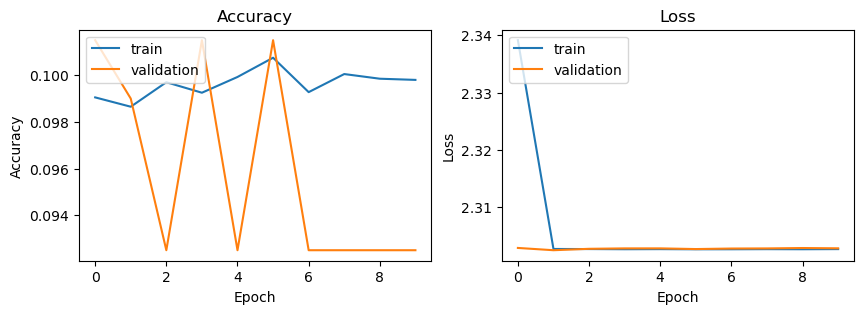

In [74]:
plot_acc_loss(history1)

## Use only the first three blocks (`extra bonus`)

In [75]:
(x_train_3, y_train_3), (x_val_3, y_val_3) = keras.datasets.cifar10.load_data()
x_train_3 = x_train_3.astype('float32') / 255.0
x_val_3 = x_val_3.astype('float32') / 255.0
num_classes = 10
y_train_3 = to_categorical(y_train_3, num_classes)
y_val_3 = to_categorical(y_val_3, num_classes)

In [76]:
# create an instance of the ImageDataGenerator
datagen2 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    validation_split=0.2
)

# resize and preprocess the images using the ImageDataGenerator
train_generator2 = datagen2.flow(x_train_3, y_train_3, batch_size=64, subset='training', shuffle=True)
validation_generator2 = datagen2.flow(x_val_3, y_val_3, batch_size=64, subset='validation', shuffle=False)

In [78]:
new_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
hold = new_model.layers[-3:]
r = tf.keras.models.Model(inputs=new_model.input, outputs=[layer.output for layer in hold])
r.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [79]:
inputs2 = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning
y = r(inputs2, training=False)
# convert features of shape `base_model.output_shape[1:]` to vectors
y = keras.layers.concatenate(y)
y = keras.layers.GlobalAveragePooling2D()(y)
# A Dense classifier with a single unit (binary classification)
y = keras.layers.Dense(256, activation='relu')(y)
outputs2 = keras.layers.Dense(num_classes, activation='softmax')(y)

model2 = keras.Model(inputs2, outputs2)
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           [(None, 7, 7, 2048)  23587712    ['input_11[0][0]']               
                                , (None, 7, 7, 2048                                               
                                ),                                                                
                                 (None, 7, 7, 2048)                                               
                                ]                                                           

In [80]:
#compile and train the model exept the part of resnet
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2 = model2.fit(train_generator2, validation_data=validation_generator2, batch_size=64, epochs=10)

Epoch 1/10
625/625 [==============================] - 72s 53ms/step - loss: 2.6163 - accuracy: 0.1026 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 2/10
625/625 [==============================] - 32s 51ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0925
Epoch 3/10
625/625 [==============================] - 32s 51ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.0925
Epoch 4/10
625/625 [==============================] - 30s 48ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.0925
Epoch 5/10
625/625 [==============================] - 30s 48ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 6/10
625/625 [==============================] - 31s 50ms/step - loss: 2.3027 - accuracy: 0.0956 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 7/10
625/625 [==============================] - 32s 52ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy:

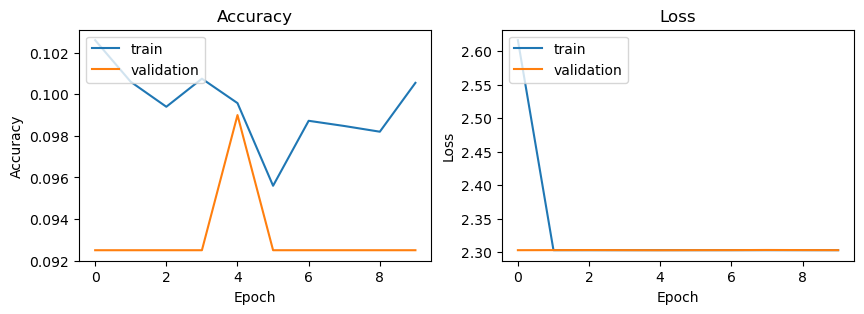

In [81]:
plot_acc_loss(history2)